https://ai.google.dev/edge/mediapipe/solutions/customization/gesture_recognizer

In [ ]:
# !pip install tensorflow --upgrade
import tensorflow as tf
# !pip install mediapipe-model-maker
# !pip install kagglehub

In [ ]:
# !pip install tensorflow --upgrade
# !tensorflow -V
# !pip list
# !pip install numpy --upgrade
from google.colab import files
import os
import tensorflow as tf
print(tf.__version__)
# assert tf.__version__.startswith('2')
# from tensorflow.python.framework import dtypes
from mediapipe_model_maker import gesture_recognizer

import matplotlib.pyplot as plt

import kagglehub

path = kagglehub.dataset_download("innominate817/hagrid-sample-30k-384p")
kagglehub.dataset_download("kapitanov/hagrid")

print("Path to dataset files:", path)

2.15.1


/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


100%|██████████| 823M/823M [00:09<00:00, 92.7MB/s]

Extracting files...


100%|██████████| 338M/338M [00:06<00:00, 54.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5


/root/.cache/kagglehub/datasets/kapitanov/hagrid/versions/3/ann_train_val
['']
['fist.json']

fist.json 27764

/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k/train_val_fist

IMAGE EXISTS
0031a6a9-9d93-4e63-907b-7fabe08a9209 0
[0.388685, 0.42120625, 0.08925, 0.12893625]
RESIZED BY 192.62184873949576%
[0.388685, 0.477935, 0.42120625, 0.5501425]
[0.388685, 0.477935, 0.4498575, 0.57879375]
RESIZED BY 192.62184873949576%
[0.3473525, 0.5192675, 0.4498575, 0.57879375]

IMAGE EXISTS
0051add8-5f64-4e7c-9bb9-ad2a3345cdea 1
[0.628305, 0.56628875, 0.13961875, 0.09730375]
RESIZED BY 107.61564944824839%
[0.628305, 0.76792375, 0.56628875, 0.6635925]
[0.628305, 0.76792375, 0.33640749999999997, 0.43371125]
RESIZED BY 107.61564944824839%
[0.628305, 0.76792375, 0.33270234374999996, 0.43741640625]

IMAGE EXISTS
0076df79-2901-40c8-8db6-57bec455ba90 2
[0.68596525, 0.53723248, 0.15765471, 0.1239907]
RESIZED BY 104.86266685805542%
[0.68596525,

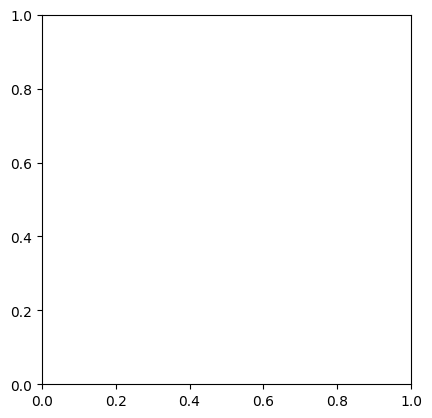

In [ ]:
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.image as mpimg

def resize(dim, w, h):
  x = dim[1] - dim[0]
  y = dim[3] - dim[2]
  if(x * h) < (y * w):
    print(f"RESIZED BY {(100.0*y*w)/(x*h)}%")
    avg = ((dim[0] + dim[1]) / 2)
    fact = (y * w) / (2 * h)
    return [avg - fact, avg + fact, dim[2], dim[3]]
  elif(x * h) > (y * w):
    print(f"RESIZED BY {(100.0*x*h)/(y*w)}%")
    avg = ((dim[2] + dim[3]) / 2)
    fact = (x * h) / (2 * w)
    return [dim[0], dim[1], avg - fact, avg + fact]
  return dim

# print(resize([0.0, 4.0, 1.0, 4.0], 4.0, 3.0))
# print(resize([0.0, 6.0, 0.0, 6.0], 4.0, 3.0))
# print(resize([0.0, 4.0, 0.0, 1.0], 4.0, 3.0))

# dataset_path = "/root/.cache/kagglehub/datasets/kapitanov/hagrid/versions/3/ann_subsample"
# dataset_path = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/ann_train_val"
dataset_path = "/root/.cache/kagglehub/datasets/kapitanov/hagrid/versions/3/ann_train_val"
image_path = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k"
print(dataset_path)
# print(os.listdir(dataset_path))
labels = []
# for i in os.listdir(dataset_path):
#   # if os.path.exists(os.path.join(dataset_path, i)):
#   if os.path.isdir(os.path.join(dataset_path, i)):
#     labels.append(i)
# else:
#   print("HELP", os.path.join(dataset_path, ("content/" + i)), i)
#   print(os.path.commonpath(i))

labels.append("")
print(labels)

NUM_EXAMPLES = 1

for label in labels:
  label_dir = os.path.join(dataset_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  print(example_filenames)
  # fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  plt.gca().set_aspect('equal')
  for i in range(NUM_EXAMPLES):
    with open(os.path.join(label_dir, example_filenames[i])) as f:
      d = json.load(f)
    cn = 0
    print(f"\n{example_filenames[i]} {len(d.keys())}\n")
    image2_path = os.path.join(image_path, f"train_val_{example_filenames[i].split('.')[0]}")
    print(image2_path)
    for k in d.keys():
      if (os.path.exists(os.path.join(image2_path, k + ".jpg"))):
        print("\nIMAGE EXISTS")
      else:
        continue
      g = d[k]
      numGestures = len(g["bboxes"])
      print(k, cn)
      cn += 1
      for gnum in range(numGestures):
        if len(g["landmarks"][gnum]) == 0:
          continue
        box = []
        gesturePoints = []
        gesturePointsX = []
        gesturePointsY = []
        for bbind in range(4):
          box.append(g["bboxes"][gnum][bbind])
        for gp in range(len(g["landmarks"][gnum])):
          gesturePoints.append([g["landmarks"][gnum][gp][0], g["landmarks"][gnum][gp][1]])
          gesturePointsX.append(g["landmarks"][gnum][gp][0])
          gesturePointsY.append(1 - g["landmarks"][gnum][gp][1])

        print(box)
        plotDim = resize([box[0], box[0] + box[2], 1 - (box[1] + box[3]), 1 - box[1]], 4.0, 3.0)
        # plotDim = [box[0], box[0] + box[2], 1 - (box[1] + box[3]), 1 - box[1]]
        # plotDim2 = resize([box[0], box[0] + box[2], 1 - (box[1] + box[3]), 1 - box[1]], 4.0, 3.0)
        print([box[0], box[0] + box[2], box[1], box[1] + box[3]])
        print([box[0], box[0] + box[2], 1 - (box[1] + box[3]), 1 - box[1]])
        print(resize([box[0], box[0] + box[2], 1 - (box[1] + box[3]), 1 - box[1]], 4.0, 3.0))
        # print(plotDim)
        # print(type(gesturePointsX), len(gesturePointsY))
        # plt.plot(gesturePointsX[:2] + gesturePointsX[5:6] + gesturePointsX[9:10] + gesturePointsX[13:14] + gesturePointsX[17:18], gesturePointsY[:2] + gesturePointsY[5:6] + gesturePointsY[9:10] + gesturePointsY[13:14] + gesturePointsY[17:18])

        # plt.plot(gesturePointsX[:3], gesturePointsY[:3])
        # plt.plot(gesturePointsX[2:5], gesturePointsY[2:5])
        # plt.plot(gesturePointsX[:1] + gesturePointsX[5:9], gesturePointsY[:1] + gesturePointsY[5:9])
        # plt.plot(gesturePointsX[:1] + gesturePointsX[9:13], gesturePointsY[:1] + gesturePointsY[9:13])
        # plt.plot(gesturePointsX[:1] + gesturePointsX[13:17], gesturePointsY[:1] + gesturePointsY[13:17])
        # plt.plot(gesturePointsX[:1] + gesturePointsX[17:], gesturePointsY[:1] + gesturePointsY[17:])
        # plt.plot(gesturePointsX[1:2] + gesturePointsX[5:6] + gesturePointsX[9:10] + gesturePointsX[13:14] + gesturePointsX[17:18], gesturePointsY[1:2] + gesturePointsY[5:6] + gesturePointsY[9:10] + gesturePointsY[13:14] + gesturePointsY[17:18])
        # # plt.plot(gesturePointsX[3:6], gesturePointsY[3:6])
        # # plt.plot(gesturePointsX[6:11], gesturePointsY[6:11])
        # # plt.scatter(([gesturePointsX[px] for px in range(len(gesturePointsX)) if px not in [8, 12, 16, 20]]), ([gesturePointsY[py] for py in range(len(gesturePointsY)) if py not in [8, 12, 16, 20]]))
        # # plt.scatter(gesturePointsX[0:8,9:12,13:16,17:20], gesturePointsY[0:8,9:12,13:16,17:20])
        # plt.scatter(gesturePointsX[:3], gesturePointsY[:3])
        # plt.scatter(gesturePointsX[3:4], gesturePointsY[3:4])
        # plt.scatter(gesturePointsX[5:8], gesturePointsY[5:8])
        # plt.scatter(gesturePointsX[9:12], gesturePointsY[9:12])
        # plt.scatter(gesturePointsX[13:16], gesturePointsY[13:16])
        # plt.scatter(gesturePointsX[17:20], gesturePointsY[17:20])
        # plt.xlim(plotDim[:2])
        # plt.ylim(plotDim[2:])
        # plt.show()
        # plt.imshow(mpimg.imread(os.path.join(image2_path, k + ".jpg")))
        # # plt.xlim(plotDim[:2])
        # # plt.xlim(plotDim[2:])
        # plt.show()
        # plt.scatter(gesturePointsX, gesturePointsY)
        # plt.show()

      if cn == 5:
        break
    # print((os.path.join(label_dir, example_filenames[i])))
    # axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    # axs[i].get_xaxis().set_visible(False)
    # axs[i].get_yaxis().set_visible(False)
  # fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

# aax = [1, 2, 3]
# aay = [2, 3, 4]
# plt.plot(aax, aay)
# plt.show()
# plt.show()

In [ ]:
!rmdir /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k_2/train_val_two_up/".ipynb_checkpoints"

In [ ]:
# !zip -r /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k_2.zip /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k_2
# from google.colab import files
# files.download("/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k_2.zip")
data = gesture_recognizer.Dataset.from_folder(
    dirname="/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k_2",
    hparams=gesture_recognizer.HandDataPreprocessingParams(shuffle=True, min_detection_confidence=0.5)
)
print("/tmp/model_maker/gesture_recognizer")
# train_data, rest_data = data.split(0.7)
# validation_data, test_data = rest_data.split(0.5)

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite


Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder
/tmp/model_maker/gesture_recognizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# dont run
# train_data, rest_data = data.split(0.7)
# validation_data, test_data = rest_data.split(0.5)
print(train_data.label_names)

['none', 'train_val_call', 'train_val_dislike', 'train_val_fist', 'train_val_four', 'train_val_like', 'train_val_mute', 'train_val_ok', 'train_val_one', 'train_val_palm', 'train_val_peace', 'train_val_peace_inverted', 'train_val_rock', 'train_val_stop', 'train_val_three', 'train_val_three2', 'train_val_two_up']


In [ ]:
hparams = gesture_recognizer.HParams(export_dir="exported_model_3", epochs=40 )
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 re_lu_6 (ReLU)              (None, 128)               0         
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 17)                2193      
 out (Dense)                                                     
                                                           

In [ ]:
print(hparams)

HParams(learning_rate=0.001, batch_size=2, epochs=40, steps_per_epoch=2785, class_weights=None, shuffle=False, repeat=False, export_dir='exported_model', distribution_strategy='off', num_gpus=0, tpu='', _strategy=<tensorflow.python.distribute.distribute_lib._DefaultDistributionStrategy object at 0x794b7a71b990>, lr_decay=0.99, gamma=2)


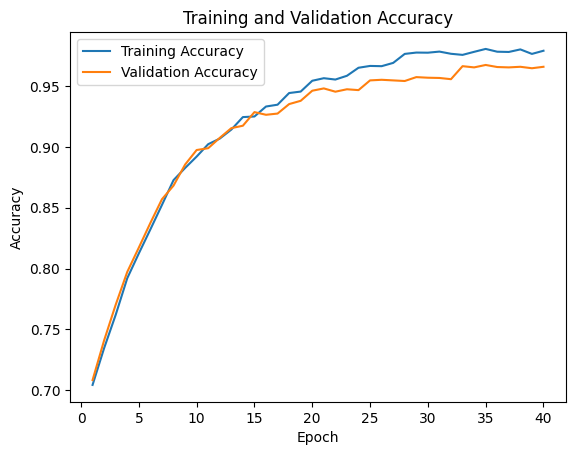

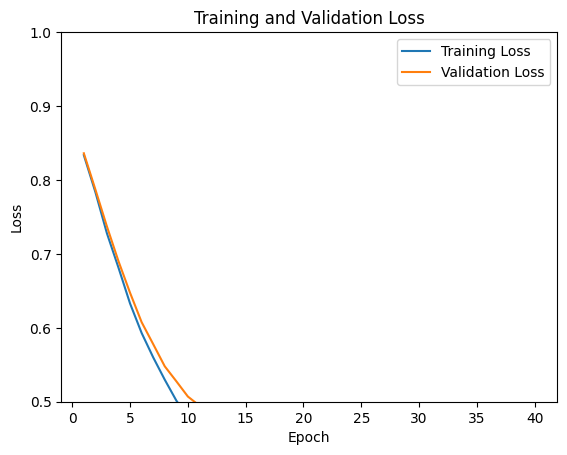

In [3]:
import matplotlib.pyplot as plt

epochs = list(range(1, 41))

train_loss = [
    0.8336, 0.7836, 0.7277, 0.6812, 0.6328, 0.5930, 0.5600, 0.5298, 0.5016, 0.4791,
    0.4580, 0.4396, 0.4247, 0.4101, 0.3976, 0.3889, 0.3836, 0.3773, 0.3723, 0.3645,
    0.3627, 0.3597, 0.3538, 0.3529, 0.3517, 0.3516, 0.3489, 0.3431, 0.3405, 0.3390,
    0.3374, 0.3359, 0.3321, 0.3292, 0.3236, 0.3179, 0.3166, 0.3152, 0.3117, 0.3103
]

train_accuracy = [
    0.7042, 0.7345, 0.7619, 0.7920, 0.8124, 0.8322, 0.8523, 0.8727, 0.8827, 0.8921,
    0.9023, 0.9069, 0.9143, 0.9246, 0.9251, 0.9333, 0.9348, 0.9444, 0.9456, 0.9545,
    0.9566, 0.9555, 0.9586, 0.9652, 0.9667, 0.9665, 0.9692, 0.9766, 0.9777, 0.9776,
    0.9785, 0.9767, 0.9758, 0.9783, 0.9807, 0.9784, 0.9782, 0.9803, 0.9766, 0.9792
]

val_loss = [
    0.8361, 0.7871, 0.7370, 0.6900, 0.6473, 0.6076, 0.5779, 0.5479, 0.5277, 0.5070,
    0.4947, 0.4831, 0.4669, 0.4572, 0.4506, 0.4451, 0.4424, 0.4374, 0.4324, 0.4314,
    0.4263, 0.4219, 0.4175, 0.4144, 0.4141, 0.4107, 0.4097, 0.4111, 0.4132, 0.4079,
    0.4095, 0.4100, 0.4022, 0.4063, 0.4068, 0.4050, 0.4045, 0.4097, 0.4075, 0.4096  ]

val_accuracy = [
    0.7082, 0.7409, 0.7702, 0.7972, 0.8172, 0.8375, 0.8570, 0.8682, 0.8855, 0.8975,
    0.8990, 0.9075, 0.9155, 0.9175, 0.9287, 0.9265, 0.9275, 0.9353, 0.9380, 0.9463,
    0.9482, 0.9455, 0.9475, 0.9468, 0.9548, 0.9553, 0.9548, 0.9543, 0.9575, 0.9570,
    0.9568, 0.9558, 0.9665, 0.9655, 0.9675, 0.9658, 0.9655, 0.9660, 0.9648, 0.9660
]

plt.plot(epochs, train_accuracy, label="Training Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

#plt.ylim(0.5,1.5)
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0.5,1)
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
model.export_model()

Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/canned_gesture_classifier.tflite


AttributeError: 'ellipsis' object has no attribute 'shape'

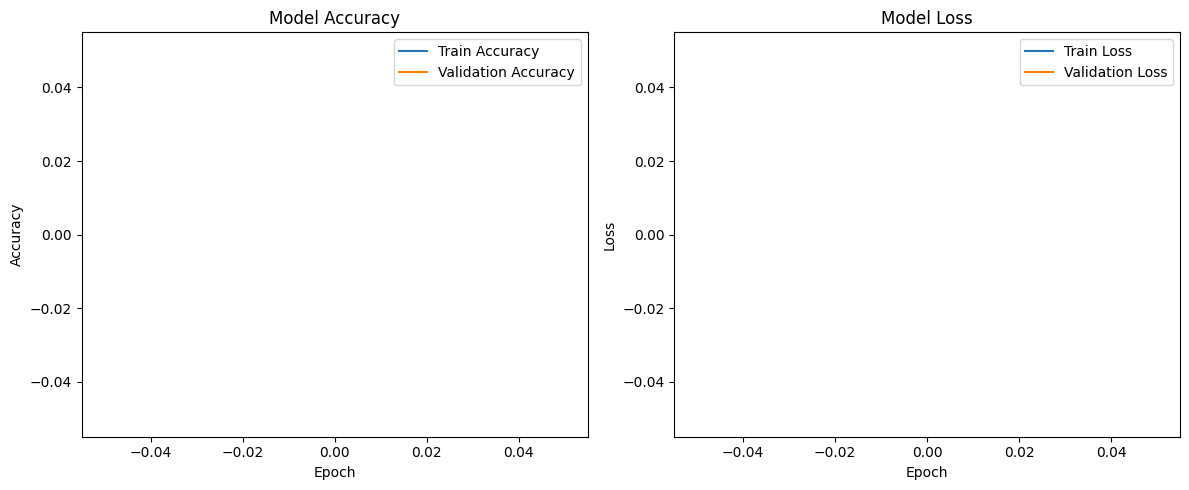

ValueError: max() arg is an empty sequence

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to extract scalars from TensorBoard logs
def extract_scalars(log_dir, tag):
    event_acc = EventAccumulator(log_dir, size_guidance={'scalars': 0})
    event_acc.Reload()
    if tag in event_acc.Tags()['scalars']:
        events = event_acc.Scalars(tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]
        return steps, values
    return [], []

# Paths to log files (Update these based on your file structure)
train_log_dir = "exported_model/logs/train"
val_log_dir = "exported_model/logs/validation"

# Extract accuracy and loss
train_steps, train_acc = extract_scalars(train_log_dir, 'epoch_accuracy')
val_steps, val_acc = extract_scalars(val_log_dir, 'epoch_accuracy')
train_steps_loss, train_loss = extract_scalars(train_log_dir, 'epoch_loss')
val_steps_loss, val_loss = extract_scalars(val_log_dir, 'epoch_loss')

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_steps, train_acc, label="Train Accuracy")
plt.plot(val_steps, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_steps_loss, train_loss, label="Train Loss")
plt.plot(val_steps_loss, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.tight_layout()
plt.show()

# Check for Overfitting
if max(train_acc) > max(val_acc) + 0.1:  # Adjust threshold if needed
    print("Possible overfitting: Training accuracy is significantly higher than validation accuracy.")
else:
    print("No clear indication of overfitting.")


In [ ]:
pip install mediapipe opencv-python numpy

In [ ]:
import mediapipe as mp
from mediapipe.tasks.python.vision import GestureRecognizer, GestureRecognizerOptions
from mediapipe.tasks.python.vision.gesture_recognizer import HandLandmark

model_dir = "/tmp/model_maker/gesture_recognizer/"
gesture_embedder_path = model_dir + "gesture_embedder.tflite"
palm_detection_path = model_dir + "palm_detection_full.tflite"
hand_landmark_path = model_dir + "hand_landmark_full.tflite"
gesture_classifier_path = model_dir + "canned_gesture_classifier.tflite"

options = GestureRecognizerOptions(
    base_options=mp.tasks.BaseOptions(model_asset_path=gesture_classifier_path)
)
gesture_recognizer = GestureRecognizer.create_from_options(options)

ModuleNotFoundError: No module named 'mediapipe.tasks.python.vision.GestureRecognizer'